In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
EPOCHS=50
CHANNELS=3

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
)

Found 16011 files belonging to 10 classes.


In [4]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
len(dataset)

501

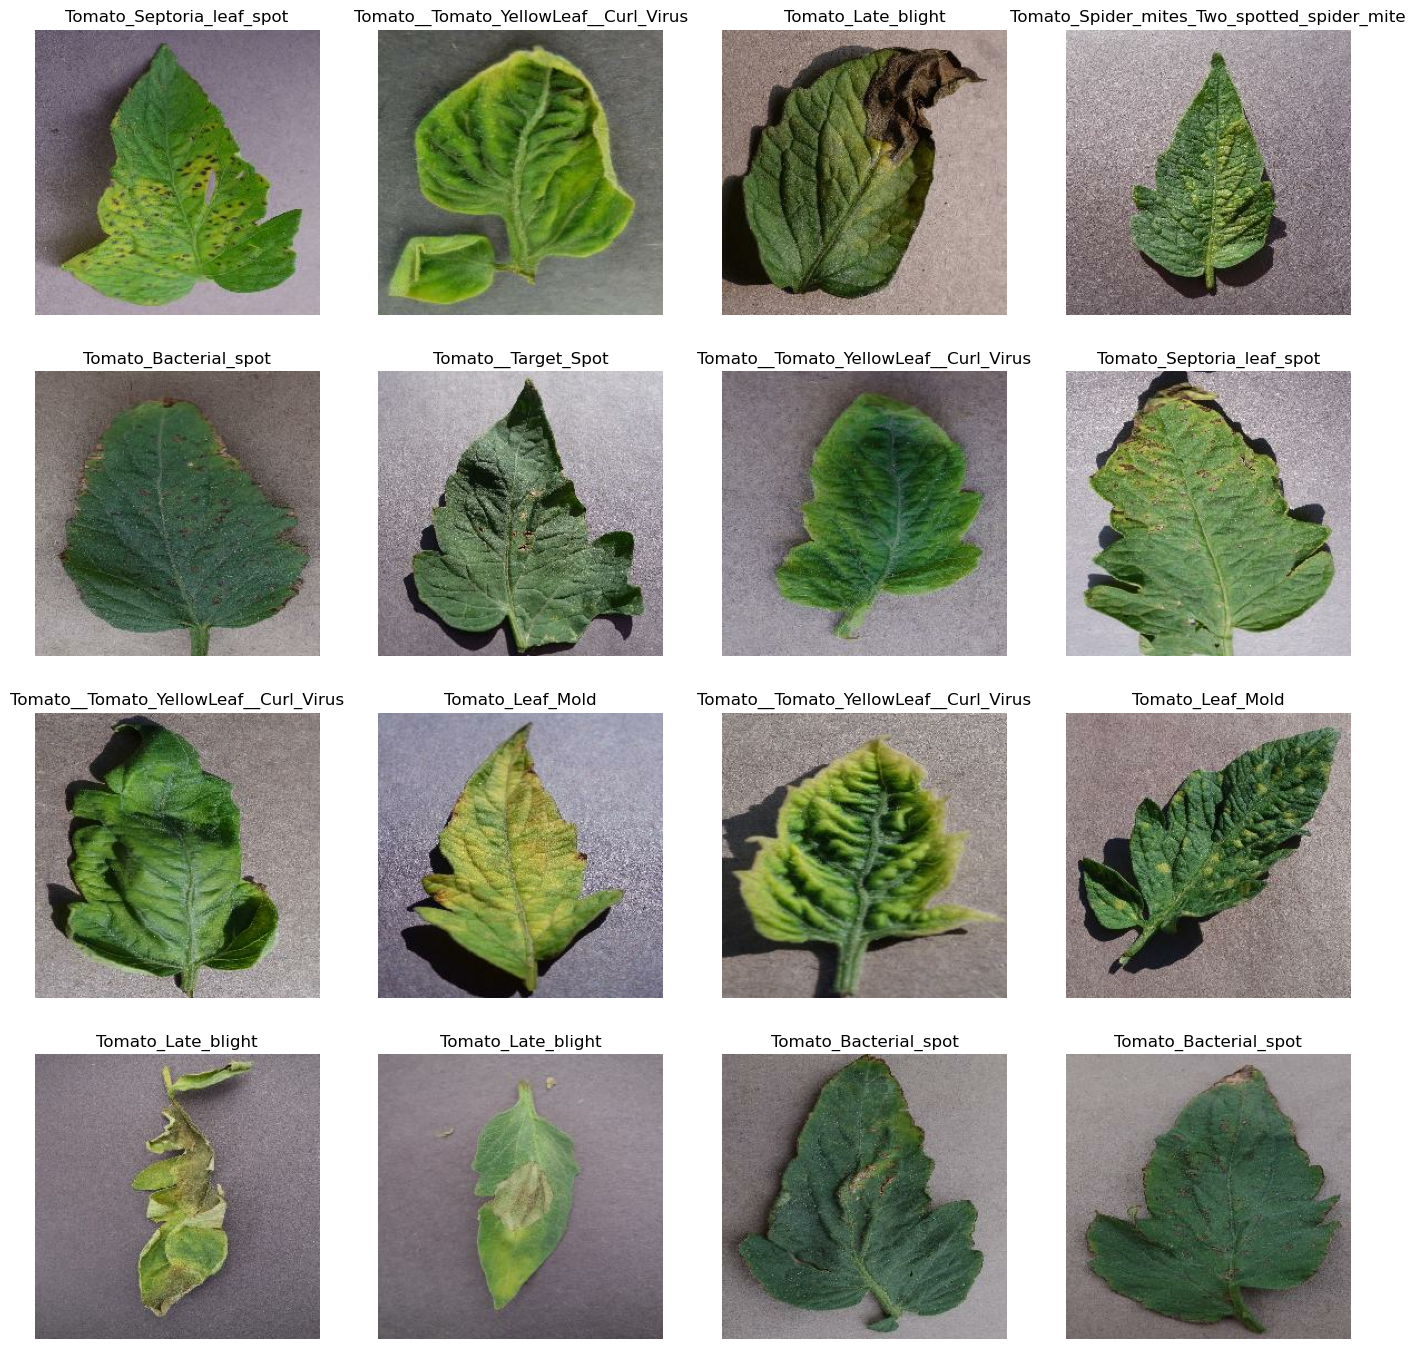

In [6]:
plt.figure(figsize=((17,17)))
for image_batch,label_batch in dataset.take(1):
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

501

In [8]:
#80% ==>training
#20% ==> 10% validation, 10% testing


In [9]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [10]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [11]:
len(train_ds)

400

In [12]:
len(val_ds)

50

In [13]:
len(test_ds)

51

In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

C:\Users\91944\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.build(input_shape=input_shape)

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip (RandomFlip)             │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 2304)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 10)                    │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 278,346 (1.06 MB)

 Trainable params: 278,346 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=True,
    validation_data=val_ds
)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 736s 2s/step - accuracy: 0.3295 - loss: 1.8501 - val_accuracy: 0.5281 - val_loss: 1.3240
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 589s 1s/step - accuracy: 0.6436 - loss: 1.0229 - val_accuracy: 0.6775 - val_loss: 0.9265
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 459s 1s/step - accuracy: 0.7791 - loss: 0.6322 - val_accuracy: 0.6662 - val_loss: 1.0734
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 454s 1s/step - accuracy: 0.8285 - loss: 0.4912 - val_accuracy: 0.8406 - val_loss: 0.4537
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 427s 1s/step - accuracy: 0.8526 - loss: 0.4205 - val_accuracy: 0.7575 - val_loss: 0.7650
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 424s 1s/step - accuracy: 0.8745 - loss: 0.3532 - val_accuracy: 0.8438 - val_loss: 0.4315
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 432s 1s/step - accuracy: 0.8963 - loss: 0.2950 - val_accuracy: 0.8494 - val_loss: 0.3938
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 406s 1s/step - accuracy: 0.9083 - loss: 0.2659 - val_accu

In [20]:
scores=model.evaluate(test_ds) 

51/51 ━━━━━━━━━━━━━━━━━━━━ 134s 441ms/step - accuracy: 0.9697 - loss: 0.0830


In [21]:
scores

[0.10202328115701675, 0.9589460492134094]

In [22]:
history

In [23]:
history.params

{'verbose': True, 'epochs': 50, 'steps': 400}

In [24]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [25]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']


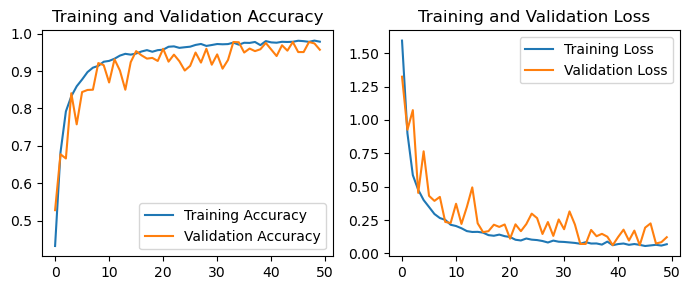

In [66]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# Plot Training and Validation Accuracy on the first subplot
axes[0].plot(range(EPOCHS), acc, label="Training Accuracy")
axes[0].plot(range(EPOCHS), val_acc, label="Validation Accuracy")
axes[0].legend(loc="lower right")
axes[0].set_title('Training and Validation Accuracy')

# Plot Training and Validation Loss on the second subplot
axes[1].plot(range(EPOCHS), loss, label="Training Loss")
axes[1].plot(range(EPOCHS), val_loss, label="Validation Loss")
axes[1].legend(loc="upper right")
axes[1].set_title('Training and Validation Loss')

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


first image to predict
actual label: Tomato__Tomato_YellowLeaf__Curl_Virus
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step
predicted label: Tomato__Tomato_YellowLeaf__Curl_Virus


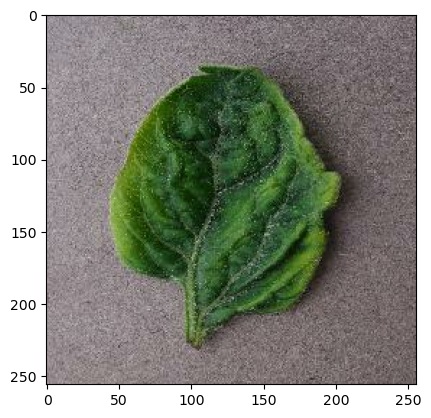

In [27]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


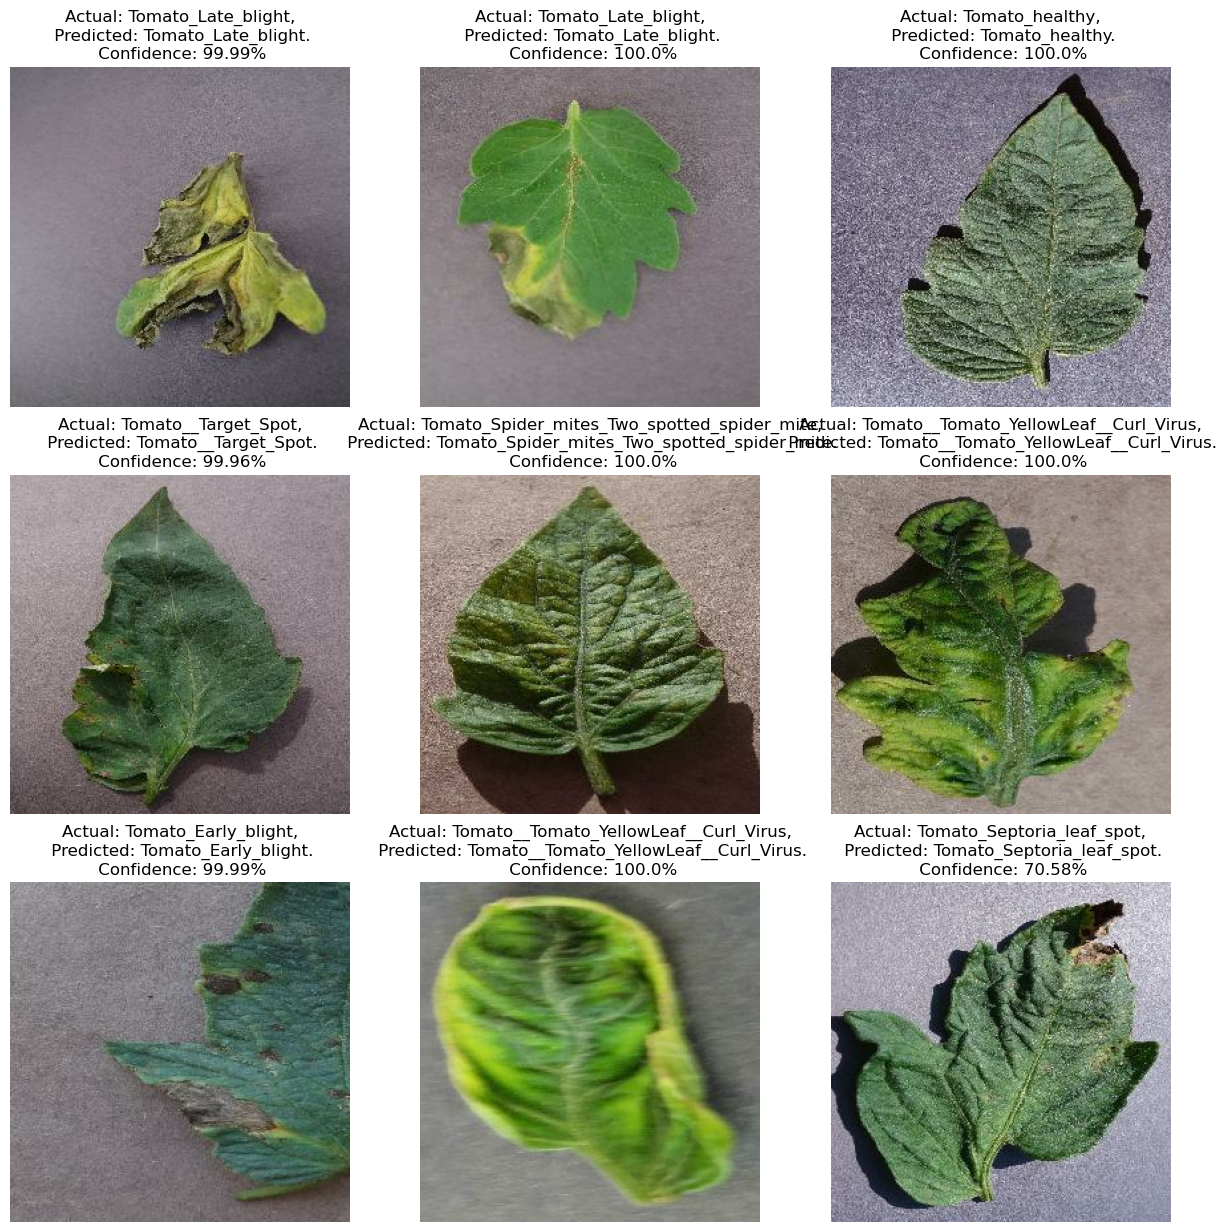

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [43]:
model.save("C:\\Users\\91944\\Desktop\\Tomato leaf disease detection\\models\\model2.keras")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted class: Tomato_Late_blight
Confidence: 100.00%


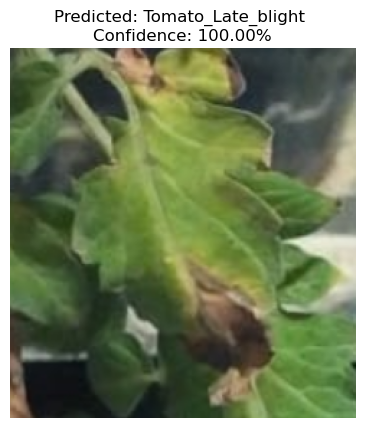

In [48]:
def preprocess_image(img_path, image_size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(image_size, image_size))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add a batch dimension
    img_array /= 255.0  # Normalize the image
    return img_array
def predict_image(model, img_array):
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    confidence = np.max(predictions) * 100
    return predicted_class, confidence

img_path = "testing.png"  # Update with the actual image path
img_array = preprocess_image(img_path, 256)
predicted_class, confidence = predict_image(model, img_array)

print(f"Predicted class: {class_names[predicted_class[0]]}")
print(f"Confidence: {confidence:.2f}%")

img = tf.keras.preprocessing.image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class[0]]} \nConfidence: {confidence:.2f}%")
plt.axis("off")
plt.show()
